In [1]:
%matplotlib notebook
import sympy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def _get_hessian(func, args):
    return sympy.Matrix([[func.diff(arg1, arg2) for arg1 in args] for arg2 in args])

def _check_point(hesse, point):
    substituted = hesse.subs(point)
    minor_dets = [substituted[:i, :i].det() for i in range(1, hesse.shape[0] + 1)]
    if all(det > 0 for det in minor_dets):
        return 'min'
    elif all(det < 0 for det in minor_dets[::2]) and all(det > 0 for det in minor_dets[1::2]):
        return 'max'
    elif 0 in minor_dets:
        return 'undefined'
    else:
        return 'saddle'
    
def _filter_points(points, bounds):
    suitable = []
    for point in points:
        is_suitable = True
        for arg in point:
            if not(bounds[arg.name][0] <= point[arg] <= bounds[arg.name][1]):
                is_suitable = False
        if is_suitable:
            suitable.append(point)
    return suitable
    
def _show_extrema(func, points):
    args = list(points[0].keys())
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_linsp = np.linspace(-10, 10, 100)
    y_linsp = np.linspace(-10, 10, 100)
    x_linsp, y_linsp = np.meshgrid(x_linsp, y_linsp)
    z_linsp = sympy.lambdify(args, func)(x_linsp, y_linsp)
    x = [float(point[args[0]]) for point in points]
    y = [float(point[args[1]]) for point in points]
    z = [float(func.subs(point)) for point in points]
    #ax.set_xlim(-0.5, 1.5)
    #ax.set_ylim(-2, 2)
    #ax.set_zlim(-2, 2)
    ax.scatter(x, y, z, c='red', s=50, alpha=1)
    ax.plot_surface(x_linsp, y_linsp, z_linsp, alpha=0.6)

In [45]:
def find_local_extremas(varnames, func, bounds=None):
    """
    varnames: ['x', 'y']
    func: 'y*(x**2) + x*(y**3) - x*y'
    bounds: {'x':[-10, 10], 'y': [-1, 1]} 
    """
    assert isinstance(varnames, list), 'список переменных задан неверно'
    assert isinstance(func, str), 'функция задана неверно'
    for symbol in func:
        if symbol.isalpha() and symbol not in varnames:
            raise Exception('аргументы функции не совпадают с заданными переменными')
    
    
    args = sympy.symbols(varnames)
    sympifyed = sympy.sympify(func)
    partial_first = [sympifyed.diff(arg) for arg in args]
    stationary_points = sympy.solve(partial_first, args, dict=True)
    
    if bounds:
        assert isinstance(bounds, dict), 'ограничения заданы неверно'
        stationary_points = _filter_points(stationary_points, bounds)
        
    if not stationary_points:
        return 'Нет стационарных точек'
    
    hesse = _get_hessian(sympifyed, args)
    _show_extrema(sympifyed, stationary_points)
    return [(point, _check_point(hesse, point)) for point in stationary_points]

[{x: 0, y: 0}]


<IPython.core.display.Javascript object>


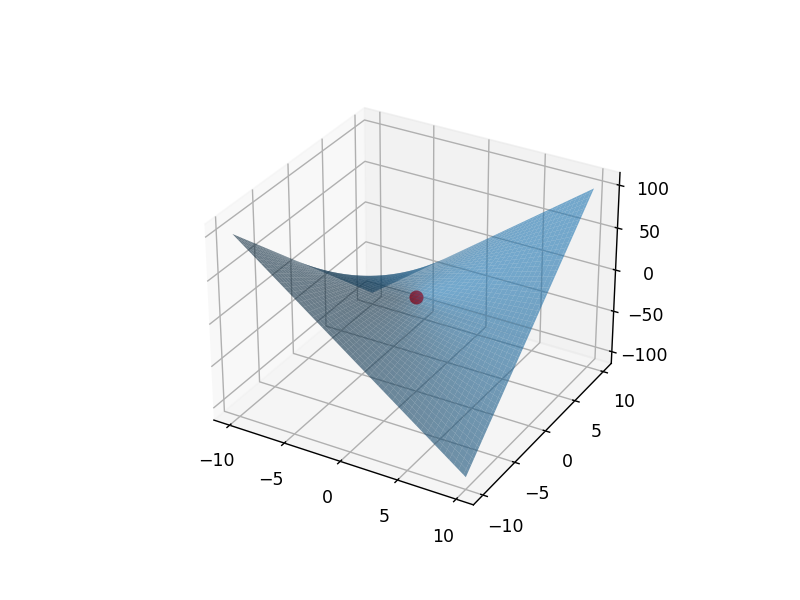

[({x: 0, y: 0}, 'undefined')]

In [47]:
find_local_extremas(['x', 'y'], 'x*y')

In [29]:
def lagrange(varnames, func, restriction, bounds=None):
    """
    varnames: ['x', 'y']
    func: 'x*y'
    restriction: 'x**2 + 4*y**2 - 1'
    bounds: {'x':[-10, 10], 'y': [-1, 1]} 
    """
    assert isinstance(varnames, list), 'список переменных задан неверно'
    assert isinstance(func, str), 'функция задана неверно'
    assert isinstance(restriction, str), 'ограничивающая функция задана неверно'
    for symbol in func:
        if symbol.isalpha() and symbol not in varnames:
            raise Exception('аргументы функции не совпадают с заданными переменными')
    
    args = sympy.symbols(varnames)
    func = sympy.sympify(func)
    restriction = sympy.sympify(restriction)
    lambda_ = sympy.Symbol('lambda')
    lagrangian = func + lambda_*restriction
    partial_first = [lagrangian.diff(arg) for arg in args+[lambda_]]
    stationary_points = sympy.solve(partial_first, args+[lambda_], dict=True)
    for point in stationary_points:
        point.pop(lambda_)
        
    
    if bounds:
        assert isinstance(bounds, dict), 'ограничения заданы неверно'
        stationary_points = _filter_points(stationary_points, bounds)
    
    if not stationary_points:
        return 'Нет стационарных точек'
    
    hesse = _get_hessian(func, args)
    _show_extrema(func, stationary_points)
    return [(point, _check_point(hesse, point)) for point in stationary_points]

<IPython.core.display.Javascript object>


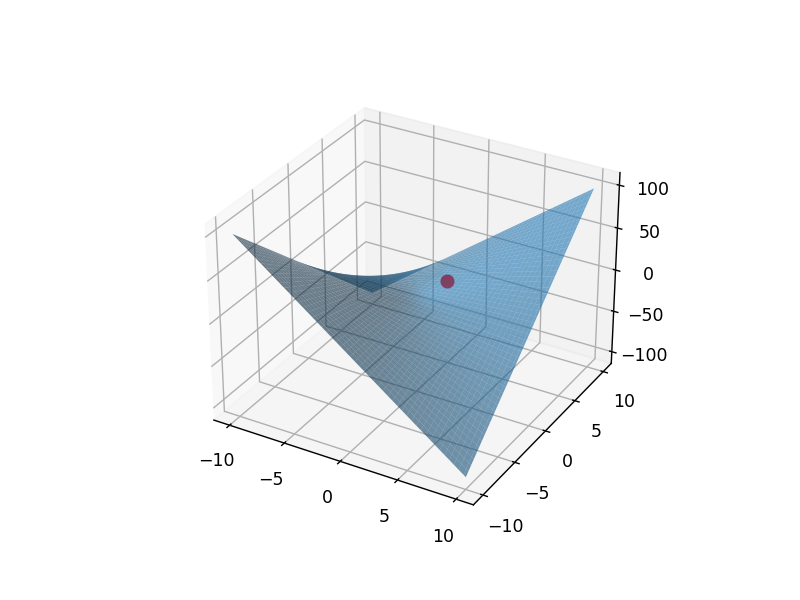

[0, -1]


[({x: 1, y: 3}, 'undefined')]

In [30]:
lagrange(['x', 'y'], 'x*y', '3*x + y - 6')